# Angel Eduardo Esquivel Vega A01276114

# K-means clustering

The notebook aims to study and implement a k-means clustering using "sklearn". The iris dataset will be used to identify clusters automatically using the K-means method.


## Acknowledgments

- Used dataset: https://archive.ics.uci.edu/ml/datasets/iris

- Inquiries: mauricio.antelis@tec.mx


# Importing libraries

In [ ]:
!pip install ucimlrepo

In [ ]:
# Import the packages that we will be using
import numpy as np                  # For array
import pandas as pd                 # For data handling
import seaborn as sns               # For advanced plotting
import matplotlib.pyplot as plt     # For showing plots
import numpy as np
from sklearn import datasets

# Note: specific functions of the "sklearn" package will be imported when needed to show concepts easily


In [ ]:
"""# Define where you are running the code: colab or local
RunInColab          = True     # (False: no  | True: yes)

# If running in colab:
if RunInColab:
    # Mount your google drive in google colab
    from google.colab import drive
    drive.mount('/content/drive')

    # Find location
    #!pwd
    #!ls
    #!ls "/content/drive/My Drive/Colab Notebooks/MachineLearningWithPython/"

    # Define path del proyecto
    Ruta            = "/content/drive/My Drive/Colab Notebooks/MachineLearningWithPython/"

else:
    # Define path del proyecto
    Ruta            = """""""""

'# Define where you are running the code: colab or local\nRunInColab          = True     # (False: no  | True: yes)\n\n# If running in colab:\nif RunInColab:\n    # Mount your google drive in google colab\n    from google.colab import drive\n    drive.mount(\'/content/drive\')\n\n    # Find location\n    #!pwd\n    #!ls\n    #!ls "/content/drive/My Drive/Colab Notebooks/MachineLearningWithPython/"\n\n    # Define path del proyecto\n    Ruta            = "/content/drive/My Drive/Colab Notebooks/MachineLearningWithPython/"\n\nelse:\n    # Define path del proyecto\n    Ruta            = '

# Importing data

In [ ]:
#Importing using sklearn library and datasets

iris = datasets.load_iris()
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
df.head()







,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


# Undertanding and preprocessing the data

1. Get a general 'feel' of the data


In [ ]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [ ]:
df.shape

(150, 5)

2. Drop rows with any missing values


In [ ]:
df = df.dropna()
df.shape

(150, 5)

3. Encoding the class label categorical column: from string to num


In [ ]:
# Encoding the categorical column {"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2}
# Categorical column in dataset was already numerical, just changing columns name

df.rename(columns={'target': 'Category'}, inplace=True)
df.head()

#Visualize the dataset


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Category
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


Now the label/category is numeric


4. Discard columns that won't be used


In [ ]:
# If necesary, drop out non necesary columns

#df = df.drop(columns=['Category'])
#df = df.drop(columns=['sepal length (cm)'])
#df = df.drop(columns=['sepal width (cm)'])
#df.head()



#No need of droping out columns

5. Scatter plot of the data

<Axes: xlabel='petal length (cm)', ylabel='petal width (cm)'>

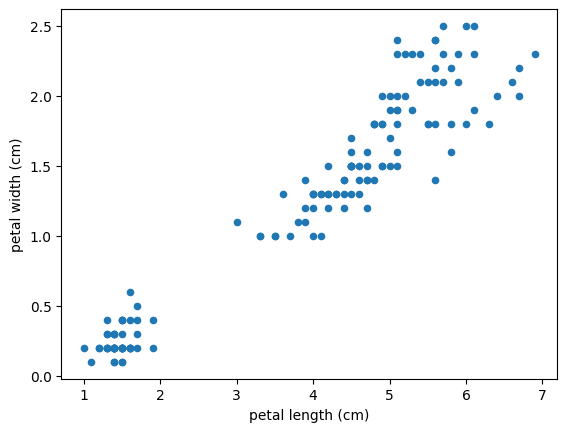

In [ ]:
#Petal length and width scatter plot.
df.plot.scatter(x='petal length (cm)', y='petal width (cm)')

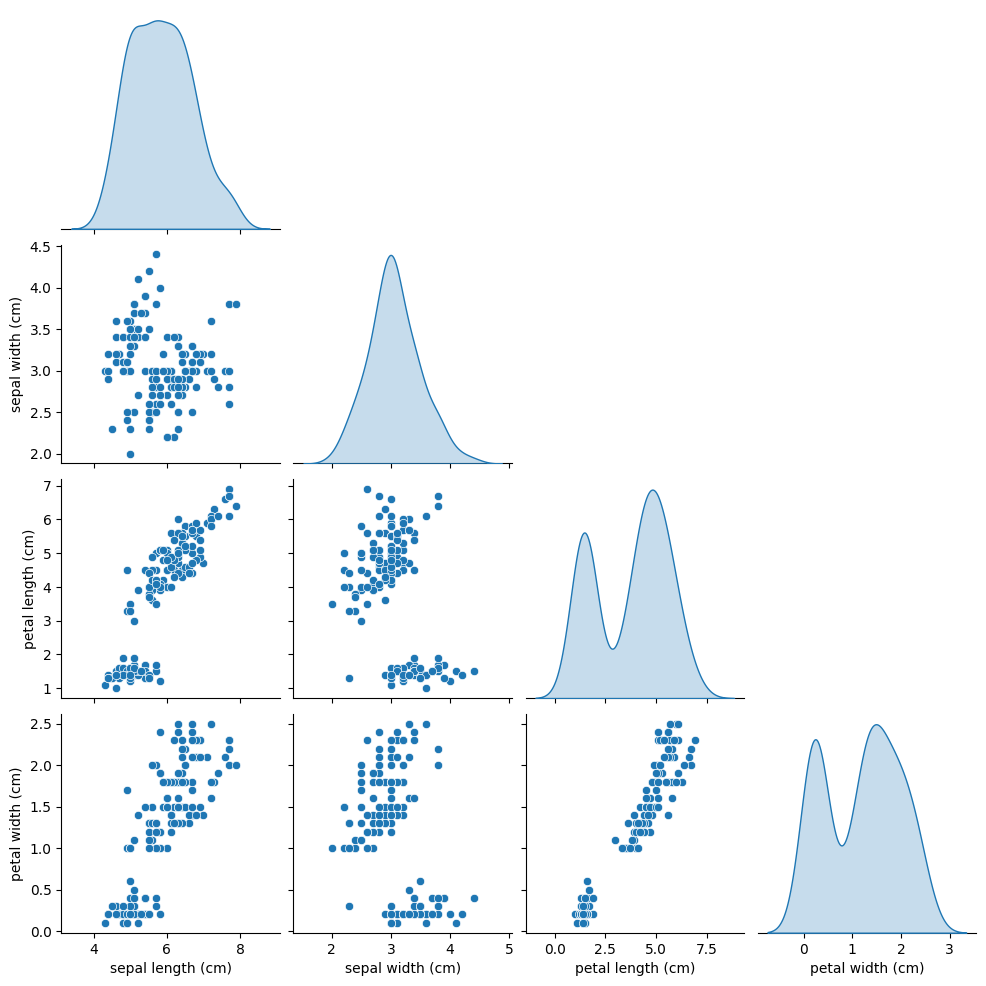

In [ ]:
# Pairplot: Scatterplot of all variables
dfTemp = df.drop(columns=['Category'])
sns.pairplot(dfTemp, corner=True,diag_kind='kde')


6. Scatter plot of the data asigning each point to the cluster it belongs to ¡¡

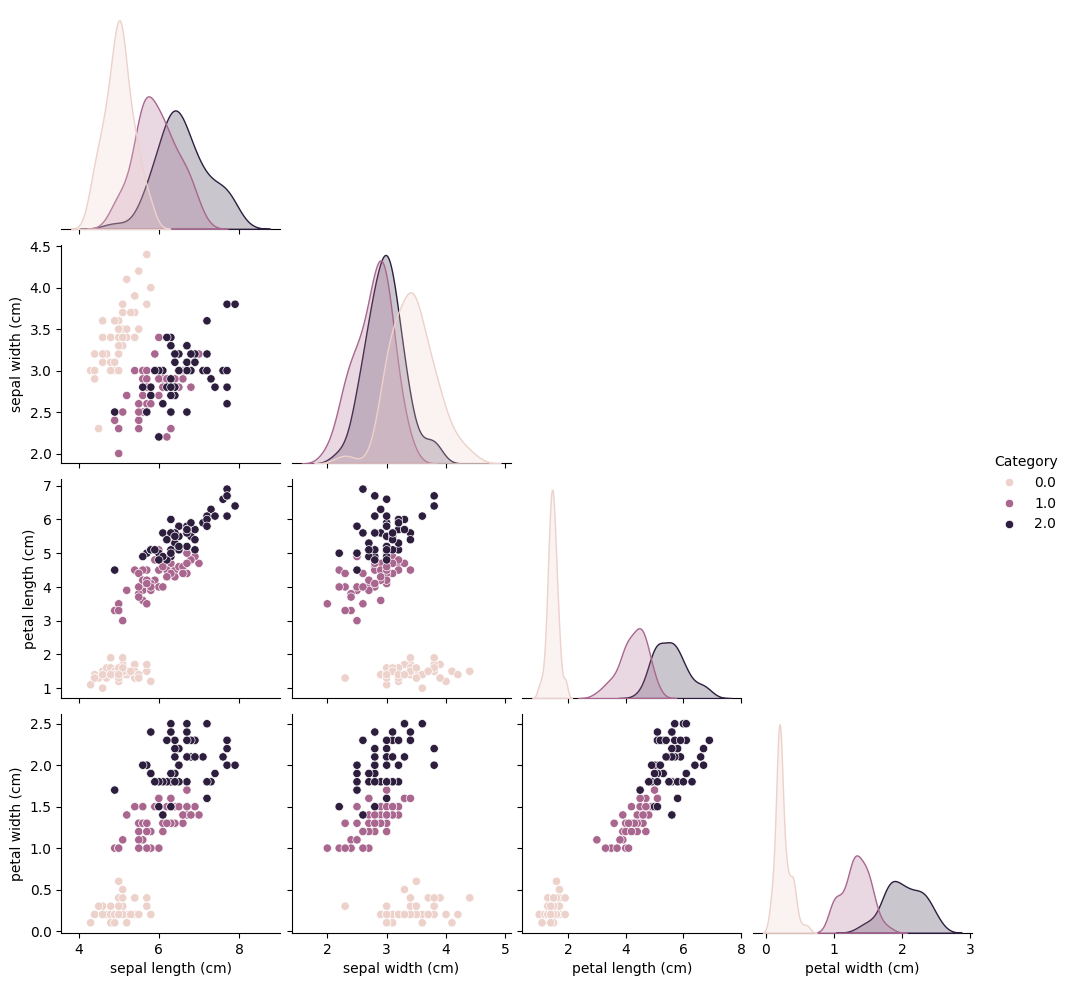

In [ ]:
# Get dataframes for each real cluster
sns.pairplot(df, corner=True,diag_kind='kde', hue='Category')


Recall that for this dataset we know in advance the class to which each point belongs to

# Kmeans clustering

Kmeans clustering

In [ ]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Category
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [ ]:
# Import sklearn KMeans
from sklearn.cluster import KMeans

# Define number of clusters
nOfClusters = 3

# Do K-means clustering (assing each point in the dataset to a cluster)
kmeans = KMeans(n_clusters=nOfClusters, random_state=0).fit(df)

# Making a dataset for cluster info
tempDF = pd.DataFrame(kmeans.labels_, columns = ['Cluster'])

# Add a new column to the dataset with the cluster information
df = pd.concat([tempDF, df], axis=1)

#Printing estimated clusteer of each point in the dataset
tempDF


,Cluster
0,1
1,1
2,1
3,1
4,1
...,...
145,2
146,2
147,2
148,2


NOTE: the lables of the estimated clusters do not agree with the lables in the real labels, therefore, it will be important to pair the labels of the real and estimated clusters

In [ ]:
# Manual pairing the labels of the real and estimated clusters

for row in df.itertuples():
  if row.Cluster == 0:
    df.at[row.Index, 'Cluster'] = 1
  elif row.Cluster == 1:
    df.at[row.Index, 'Cluster'] = 0

df



,Cluster,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Category
0,0,5.1,3.5,1.4,0.2,0.0
1,0,4.9,3.0,1.4,0.2,0.0
2,0,4.7,3.2,1.3,0.2,0.0
3,0,4.6,3.1,1.5,0.2,0.0
4,0,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...,...
145,2,6.7,3.0,5.2,2.3,2.0
146,2,6.3,2.5,5.0,1.9,2.0
147,2,6.5,3.0,5.2,2.0,2.0
148,2,6.2,3.4,5.4,2.3,2.0


In [ ]:
# Label of the estimated clusters

#Unique labels
print(np.unique(kmeans.labels_))

# All labels
print(kmeans.labels_)




[0 1 2]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 0 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [ ]:
# Cluster centroides

print(kmeans.cluster_centers_)

[[5.9   2.76  4.25  1.326 1.02 ]
 [5.006 3.428 1.462 0.246 0.   ]
 [6.624 2.984 5.562 2.026 1.98 ]]


In [ ]:
# Sum of squared error (sse) of the final model
sse = kmeans.inertia_
print(f'SSE: {sse}')

SSE: 87.26460000000003


In [ ]:
# The number of iterations required to converge
it = kmeans.n_iter_
print(f'Iterations: {it}')

Iterations: 4


<span style='color:Blue'> **Important remarks**  </span>

- The number of each cluster is randomly assigned
- The order of the numer in each cluster is random

# Plot estimated clusters

Plot estimated clusters

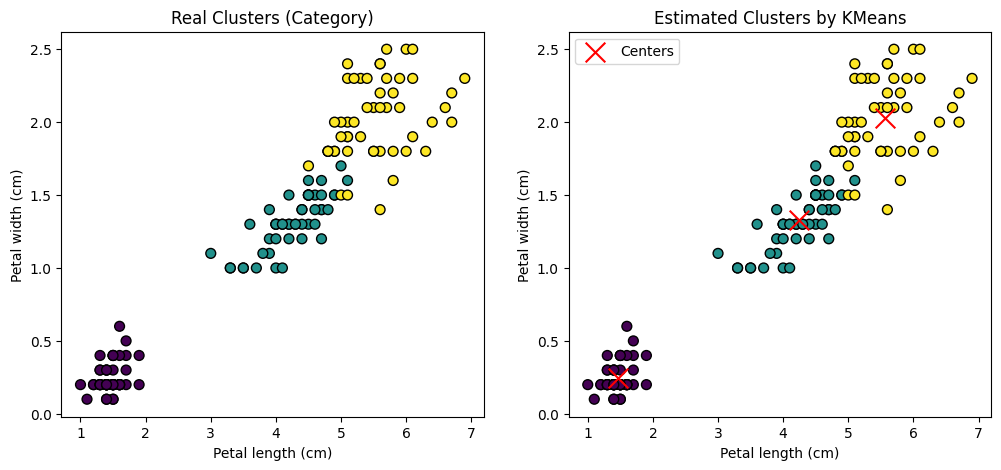

In [ ]:
import matplotlib.pyplot as plt

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot real clusters using df['Category']
ax1.scatter(df['petal length (cm)'], df['petal width (cm)'], c=df['Category'], cmap='viridis', marker='o', edgecolor='k', s=50)
ax1.set_title('Real Clusters (Category)')
ax1.set_xlabel('Petal length (cm)')
ax1.set_ylabel('Petal width (cm)')

# Plot estimated clusters using df['Cluster']
ax2.scatter(df['petal length (cm)'], df['petal width (cm)'], c=df['Cluster'], cmap='viridis', marker='o', edgecolor='k', s=50)
# Plot cluster centers in the estimated clusters plot
centers = kmeans.cluster_centers_
ax2.scatter(centers[:, 2], centers[:, 3], c='red', marker='x', s=200, label='Centers')
ax2.set_title('Estimated Clusters by KMeans')
ax2.set_xlabel('Petal length (cm)')
ax2.set_ylabel('Petal width (cm)')

# Display the plots
plt.legend()
plt.show()


<span style='color:Blue'> **Important remarks**  </span>

- Note that for K=2 ...
- Note that for K=3 ...
- Note that for K=4 ...

Concluir

# Selecting K: elbow plot

Check the acurracy of the model using k-fold cross-validation

In [ ]:
# Intialize a list to hold sum of squared error (sse)
sse = []

# Define values of k
kR = range(1, 10)

# For each k
for k in kR:
  kmeans2 = KMeans(n_clusters=k, n_init="auto")
  kmeans2.fit_predict(df[['petal length (cm)','petal width (cm)']])
  sse.append(kmeans2.inertia_)




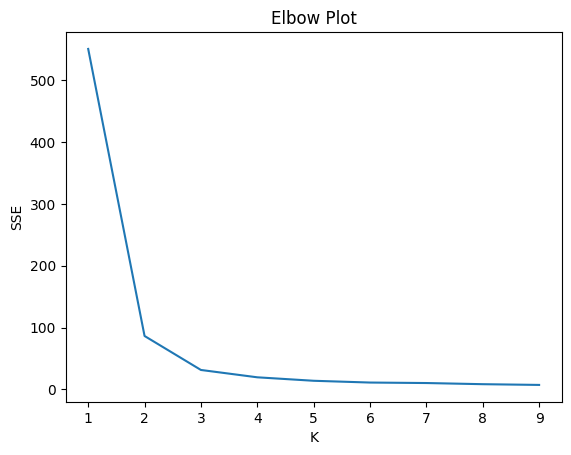

In [ ]:
# Plot sse versus k
plt.plot(kR,sse)
plt.title('Elbow Plot')
plt.xlabel('K')
plt.ylabel('SSE')
plt.show()


# Final remarks

- The number of each cluster need to be assigned assigned

- The order of the number in each cluster is random

- If there is no information about the number of clusters k, then use the elbow plot method to choose the best number of clusters k